# Basic network import and representation

Here, we play a bit with some network datasets.

We analyze the dataset 'cit-HepTh' available from the SNAP repository: http://snap.stanford.edu/data/index.html

There are several other repositories of network datasets, for instance:
- http://konect.cc/networks/
- https://networks.skewed.de/
- http://networkrepository.com/
- http://cnets.indiana.edu/resources/data-repository/
- http://www.sociopatterns.org/datasets/

In [1]:
import sys, math

In [2]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
import collections as col

We use a dictionary that associates a key (node) to a list of nodes (neighbours)

In [4]:
links_out = col.defaultdict(list)
print(links_out)

defaultdict(<class 'list'>, {})


We open the file containing the network and read each line

In [5]:
filepath = "./../datasets/cit-HepTh.txt"

In [6]:
fh = open(filepath, "r")

In [7]:
fh

<_io.TextIOWrapper name='./../datasets/cit-HepTh.txt' mode='r' encoding='UTF-8'>

In [8]:
s = fh.readlines()

In [9]:
s

['# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt \n',
 '# Paper citation network of Arxiv High Energy Physics Theory category\n',
 '# Nodes: 27770 Edges: 352807\n',
 '# FromNodeId\tToNodeId\n',
 '1001\t9304045\n',
 '1001\t9308122\n',
 '1001\t9309097\n',
 '1001\t9311042\n',
 '1001\t9401139\n',
 '1001\t9404151\n',
 '1001\t9407087\n',
 '1001\t9408099\n',
 '1001\t9501030\n',
 '1001\t9503124\n',
 '1001\t9504090\n',
 '1001\t9504145\n',
 '1001\t9505025\n',
 '1001\t9505054\n',
 '1001\t9505105\n',
 '1001\t9505162\n',
 '1001\t9506048\n',
 '1001\t9506112\n',
 '1001\t9506144\n',
 '1001\t9507050\n',
 '1001\t9507158\n',
 '1001\t9508094\n',
 '1001\t9508155\n',
 '1001\t9510142\n',
 '1001\t9510225\n',
 '1001\t9510234\n',
 '1001\t9511030\n',
 '1001\t9511171\n',
 '1001\t9601108\n',
 '1001\t9602022\n',
 '1001\t9602114\n',
 '1001\t9603003\n',
 '1001\t9603150\n',
 '1001\t9603161\n',
 '1001\t9603167\n',
 '1001\t9605184\n',
 '1001\t9605222\n',
 '1001\t9606017\n',
 '1001\t9606040\

In [10]:
s[:4]

['# Directed graph (each unordered pair of nodes is saved once): Cit-HepTh.txt \n',
 '# Paper citation network of Arxiv High Energy Physics Theory category\n',
 '# Nodes: 27770 Edges: 352807\n',
 '# FromNodeId\tToNodeId\n']

In [11]:
s[10].strip().split()

['1001', '9407087']

In [12]:
for line in s:
    # remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    t = line.strip().split()
    if t[0] != "#":
        # the first lines are comments
        origin = int(t[0])
        dest = int(t[1])
        links_out[origin].append(dest)

# close the file
fh.close()

In [13]:
len(links_out[1001])

83

How many nodes are in the network?

In [14]:
tot_nodes = len(links_out)
print(tot_nodes)

25059


We calculate the out-degree distribution of the network.

In [15]:
degree_out = {}

for i in links_out:

    deg_out = len(links_out[i])

    if deg_out in degree_out:
        degree_out[deg_out] += 1
    else:
        degree_out[deg_out] = 1

In [16]:
print(sorted(degree_out.keys()))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 112, 115, 120, 121, 122, 123, 124, 125, 126, 134, 135, 136, 139, 142, 143, 146, 149, 154, 156, 157, 158, 159, 160, 165, 167, 169, 170, 175, 177, 180, 181, 198, 200, 201, 207, 211, 212, 214, 216, 226, 246, 263, 274, 289, 302, 359, 562]


In [17]:
degree_out

{83: 6,
 1: 2449,
 7: 1087,
 4: 1405,
 2: 1951,
 40: 104,
 9: 847,
 27: 250,
 10: 790,
 14: 622,
 21: 398,
 25: 333,
 17: 503,
 15: 556,
 19: 429,
 16: 519,
 29: 246,
 53: 32,
 28: 244,
 22: 384,
 37: 135,
 39: 114,
 35: 162,
 20: 412,
 26: 284,
 32: 194,
 23: 339,
 6: 1172,
 11: 771,
 30: 240,
 41: 98,
 65: 17,
 24: 304,
 31: 184,
 34: 166,
 56: 31,
 18: 498,
 13: 640,
 58: 35,
 36: 149,
 8: 975,
 42: 91,
 47: 60,
 52: 39,
 38: 111,
 5: 1272,
 3: 1657,
 72: 6,
 121: 4,
 54: 34,
 75: 8,
 12: 651,
 55: 37,
 84: 4,
 59: 23,
 33: 160,
 51: 45,
 46: 55,
 63: 23,
 44: 77,
 50: 45,
 73: 11,
 71: 13,
 74: 7,
 45: 61,
 165: 1,
 126: 2,
 214: 1,
 562: 1,
 68: 10,
 64: 17,
 48: 51,
 57: 33,
 134: 3,
 49: 48,
 216: 1,
 154: 3,
 61: 10,
 159: 1,
 85: 3,
 359: 1,
 43: 81,
 78: 7,
 60: 14,
 62: 16,
 66: 15,
 157: 1,
 67: 14,
 98: 1,
 70: 14,
 115: 2,
 104: 4,
 86: 5,
 207: 1,
 99: 4,
 109: 2,
 81: 5,
 123: 1,
 97: 2,
 100: 1,
 167: 1,
 91: 2,
 201: 1,
 69: 13,
 125: 1,
 77: 8,
 89: 4,
 79: 6,
 87: 1

We export the degree distribution to an output file.

In [18]:
s_deg = sorted(degree_out.keys())

In [19]:
fout = open("./../datasets/Cit-HepTh-degout-distri.txt", "w")
for d in s_deg:
    deg_freq = float(degree_out[d]) / tot_nodes

    fout.write(str(d) + "  " + str(deg_freq) + "\n")

fout.close()

In [20]:
for i in degree_out.items():
    print(i)

(83, 6)
(1, 2449)
(7, 1087)
(4, 1405)
(2, 1951)
(40, 104)
(9, 847)
(27, 250)
(10, 790)
(14, 622)
(21, 398)
(25, 333)
(17, 503)
(15, 556)
(19, 429)
(16, 519)
(29, 246)
(53, 32)
(28, 244)
(22, 384)
(37, 135)
(39, 114)
(35, 162)
(20, 412)
(26, 284)
(32, 194)
(23, 339)
(6, 1172)
(11, 771)
(30, 240)
(41, 98)
(65, 17)
(24, 304)
(31, 184)
(34, 166)
(56, 31)
(18, 498)
(13, 640)
(58, 35)
(36, 149)
(8, 975)
(42, 91)
(47, 60)
(52, 39)
(38, 111)
(5, 1272)
(3, 1657)
(72, 6)
(121, 4)
(54, 34)
(75, 8)
(12, 651)
(55, 37)
(84, 4)
(59, 23)
(33, 160)
(51, 45)
(46, 55)
(63, 23)
(44, 77)
(50, 45)
(73, 11)
(71, 13)
(74, 7)
(45, 61)
(165, 1)
(126, 2)
(214, 1)
(562, 1)
(68, 10)
(64, 17)
(48, 51)
(57, 33)
(134, 3)
(49, 48)
(216, 1)
(154, 3)
(61, 10)
(159, 1)
(85, 3)
(359, 1)
(43, 81)
(78, 7)
(60, 14)
(62, 16)
(66, 15)
(157, 1)
(67, 14)
(98, 1)
(70, 14)
(115, 2)
(104, 4)
(86, 5)
(207, 1)
(99, 4)
(109, 2)
(81, 5)
(123, 1)
(97, 2)
(100, 1)
(167, 1)
(91, 2)
(201, 1)
(69, 13)
(125, 1)
(77, 8)
(89, 4)
(79, 6)
(87, 1

In [21]:
from operator import itemgetter

In [22]:
x = []
y = []

for i in sorted(degree_out.items(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1]) / tot_nodes)

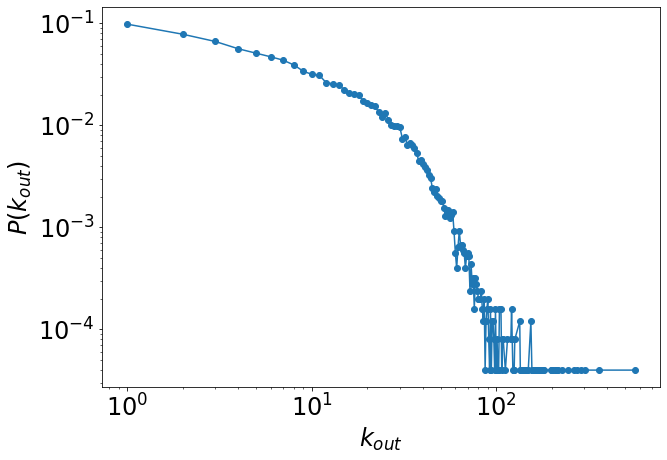

In [23]:
plt.figure(figsize=(10, 7))

plt.plot(x, y, "o-")

plt.xlabel("$k_{out}$", fontsize=24)
plt.ylabel("$P(k_{out})$", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale("log")
plt.xscale("log")

Let's have a look at the degree-in distribution.

In [24]:
links_in = col.defaultdict(list)

fh = open(filepath, "r")
# reading all the file lines
for line in fh.readlines():
    # remove "\n" characters (.strip()) and split the line at blank spaces (split.())
    s = line.strip().split()
    if s[0] != "#":
        # the first lines are comments
        origin = int(s[0])
        dest = int(s[1])
        links_in[dest].append(origin)

# chiudo il file
fh.close()

In [25]:
degree_in = col.defaultdict(int)
for i in links_in.keys():
    deg = len(links_in[i])
    degree_in[deg] += 1

tot_nodes_in = len(links_in)
print(tot_nodes_in)

23180


What is the difference from an exponential distribution?

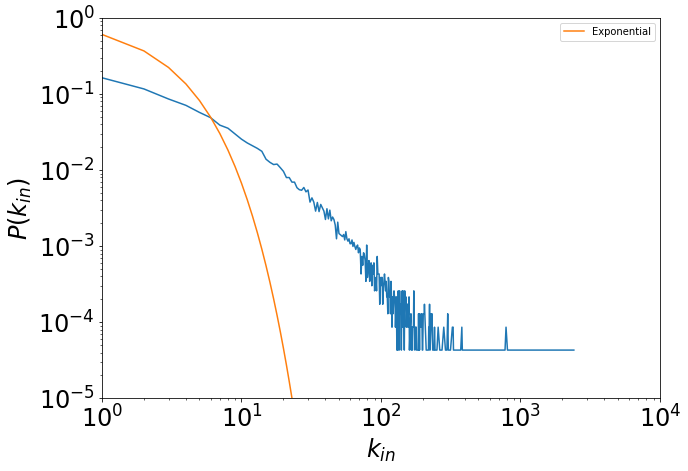

In [26]:
def f(t):
    return np.exp(-0.5 * t)


x = []
y = []
for i in sorted(degree_in.items(), key=itemgetter(0)):
    x.append(i[0])
    y.append(float(i[1]) / tot_nodes_in)

plt.figure(figsize=(10, 7))

plt.plot(np.array(x), np.array(y))
plt.plot(np.array(x), f(np.array(x)), label="Exponential")
plt.xlabel("$k_{in}$", fontsize=24)
plt.ylabel("$P(k_{in})$", fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.yscale("log")
plt.xscale("log")
plt.axis([1, 10000, 0.00001, 1])
plt.legend()
plt.show()